In [30]:
import numpy as np
import qiskit 
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

#%matplotlib inline

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q-unibw', group='hochschule-muc', project='masterarbeit')


ibmqfactory.load_account:WARNING:2021-09-04 16:27:43,949: Credentials are already in use. The existing account in the session will be replaced.


In [31]:
# https://arxiv.org/pdf/2011.10860.pdf

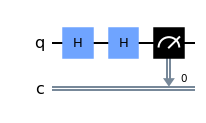

In [32]:
circuit_1 = QuantumCircuit(1,1)
circuit_1.h(0)
circuit_1.h(0)
circuit_1.measure(0,0)
circuit_1.draw('mpl')

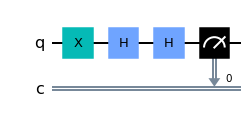

In [33]:
circuit_2 = QuantumCircuit(1,1)
circuit_2.x(0)
circuit_2.h(0)
circuit_2.h(0)
circuit_2.measure(0,0)
circuit_2.draw('mpl')

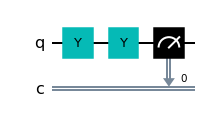

In [34]:
circuit_3 = QuantumCircuit(1,1)
circuit_3.y(0)
circuit_3.y(0)
circuit_3.measure(0,0)
circuit_3.draw('mpl')

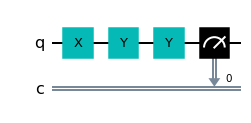

In [35]:
circuit_4 = QuantumCircuit(1,1)
circuit_4.x(0)
circuit_4.y(0)
circuit_4.y(0)
circuit_4.measure(0,0)
circuit_4.draw('mpl')

In [36]:
def run_circuit(circuit):
    backend_sim = Aer.get_backend('qasm_simulator')
    SHOTS = 1024
    job_sim = backend_sim.run(transpile(circuit, backend_sim), shots=1024)
    result_sim = job_sim.result()
    counts = result_sim.get_counts()
    freq_0 = 0.
    freq_1 = 0.
    for k,v in sorted(counts.items()):
        if k == '0':
            freq_0 = v / SHOTS
        if k == '1':
            freq_1 = v / SHOTS
    return freq_0, freq_1
    

In [37]:
v1, v2 = run_circuit(circuit_1)
v3, v4 = run_circuit(circuit_2)
v5, v6 = run_circuit(circuit_3)
v7, v8 = run_circuit(circuit_4)

V = [v1, v2, v3, v4, v5, v6, v7, v8]

print(f"V: {V}")

M1 = np.array([[v1, v3],
               [v2, v4]
              ])

M2 = np.array([[v5, v7],
               [v6, v8]
              ])

print("M1:")
print(M1)
print("M2:")
print(M2)

MG = (M1 + M2) / 2
print("MG:")
print(MG)

V: [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]
M1:
[[1. 0.]
 [0. 1.]]
M2:
[[1. 0.]
 [0. 1.]]
MG:
[[1. 0.]
 [0. 1.]]


In [38]:
X = np.random.rand(2)
X

array([0.43540484, 0.04217401])

In [39]:
MG @ X

array([0.43540484, 0.04217401])

In [40]:
def cost_function(X, V, M):
    cost = 0
    MX = M @ X  
    for i in range(0, len(V)):
        v = V[i]
        cost += ( v - MX[i] ) ** 2
    return cost

In [41]:
v = [0., 1.0] # das ist die Messung 
# x ist dann die Lösung! 

In [42]:
from scipy.optimize import minimize

In [43]:
cons = (
    {'type': 'eq', 'fun': lambda x: sum(x) - 1},
)

In [44]:
bnds = tuple([(0,1) for _ in range(0,2)])

In [45]:
res = minimize(cost_function, X, method='SLSQP', args=(v, MG), constraints=cons, bounds=bnds,
               options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.465190328815662e-32
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


In [46]:
np.round(res.x,1) # entspricht ungefähr v 

array([0., 1.])

In [47]:
cost_function(res.x, v, MG)

2.465190328815662e-32